In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import networkx as nx
import scipy.linalg

from k4 import *

plt.rc("text", usetex=False)
plt.rc("font", family = "serif",size=14)
plt.rc("figure",figsize=(12,10))
%config InlineBackend.figure_format = 'retina'

In [22]:
# equilibrium parameters

labels_f, labels_r = eq_params_k4()
print(labels_f)
print(labels_r)

[547.2, 1.671, 0.2323, 586.8]
[2.805, 0.04039, 11.72, 93870.15243908078]


In [23]:
labels_f_eq = labels_f.copy()
labels_r_eq = labels_r.copy()

print(labels_f_eq)
print(labels_r_eq)

[547.2, 1.671, 0.2323, 586.8]
[2.805, 0.04039, 11.72, 93870.15243908078]


In [24]:
aff = np.abs(np.log(np.prod(labels_f_eq)/np.prod(labels_r_eq)))
print(aff)

0.0


In [25]:
# autocorr settings
signal = [3,5,7,9]
alpha, beta  = 1, 3

In [26]:
# arrays for tracking aff, area, and eigs
N = 2000
affinities = np.empty(N, dtype=float)
areas = np.empty(N, dtype=float)
eigvals_all_r = np.zeros((N, 4), dtype=float)
eigvals_all_c = np.zeros((N, 4), dtype=float)

# edge to perturb
edge_idx = 1
perturb_edge = labels_f_eq[edge_idx] # labels_f[1] = k23

for i in tqdm(range(0,N)):
    
    labels_f_eq[edge_idx] = perturb_edge
    
    lap = lap_k4(labels_f_eq, labels_r_eq)
    
    aff = np.abs(np.log(np.prod(labels_f_eq)/np.prod(labels_r_eq)))
    affinities[i] = aff
    
    tau, _ = define_tau_range(lap, max_points=500, cap_factor=10.0)
    a13, a31 = autocorrelation_analytical(signal,lap,tau,alpha=1,beta=3)
    areas[i] = np.abs(np.trapezoid(a13)-np.trapezoid(a31))
    
    # Track eigenvalues (real part)
    eigvals = scipy.linalg.eigvals(lap)
    eigvals_all_r[i, :] = np.sort(eigvals.real)
    eigvals_all_c[i, :] = np.sort(eigvals.imag)
    
    perturb_edge *= 1.01

100%|██████████████████████████████████████| 2000/2000 [00:19<00:00, 105.05it/s]


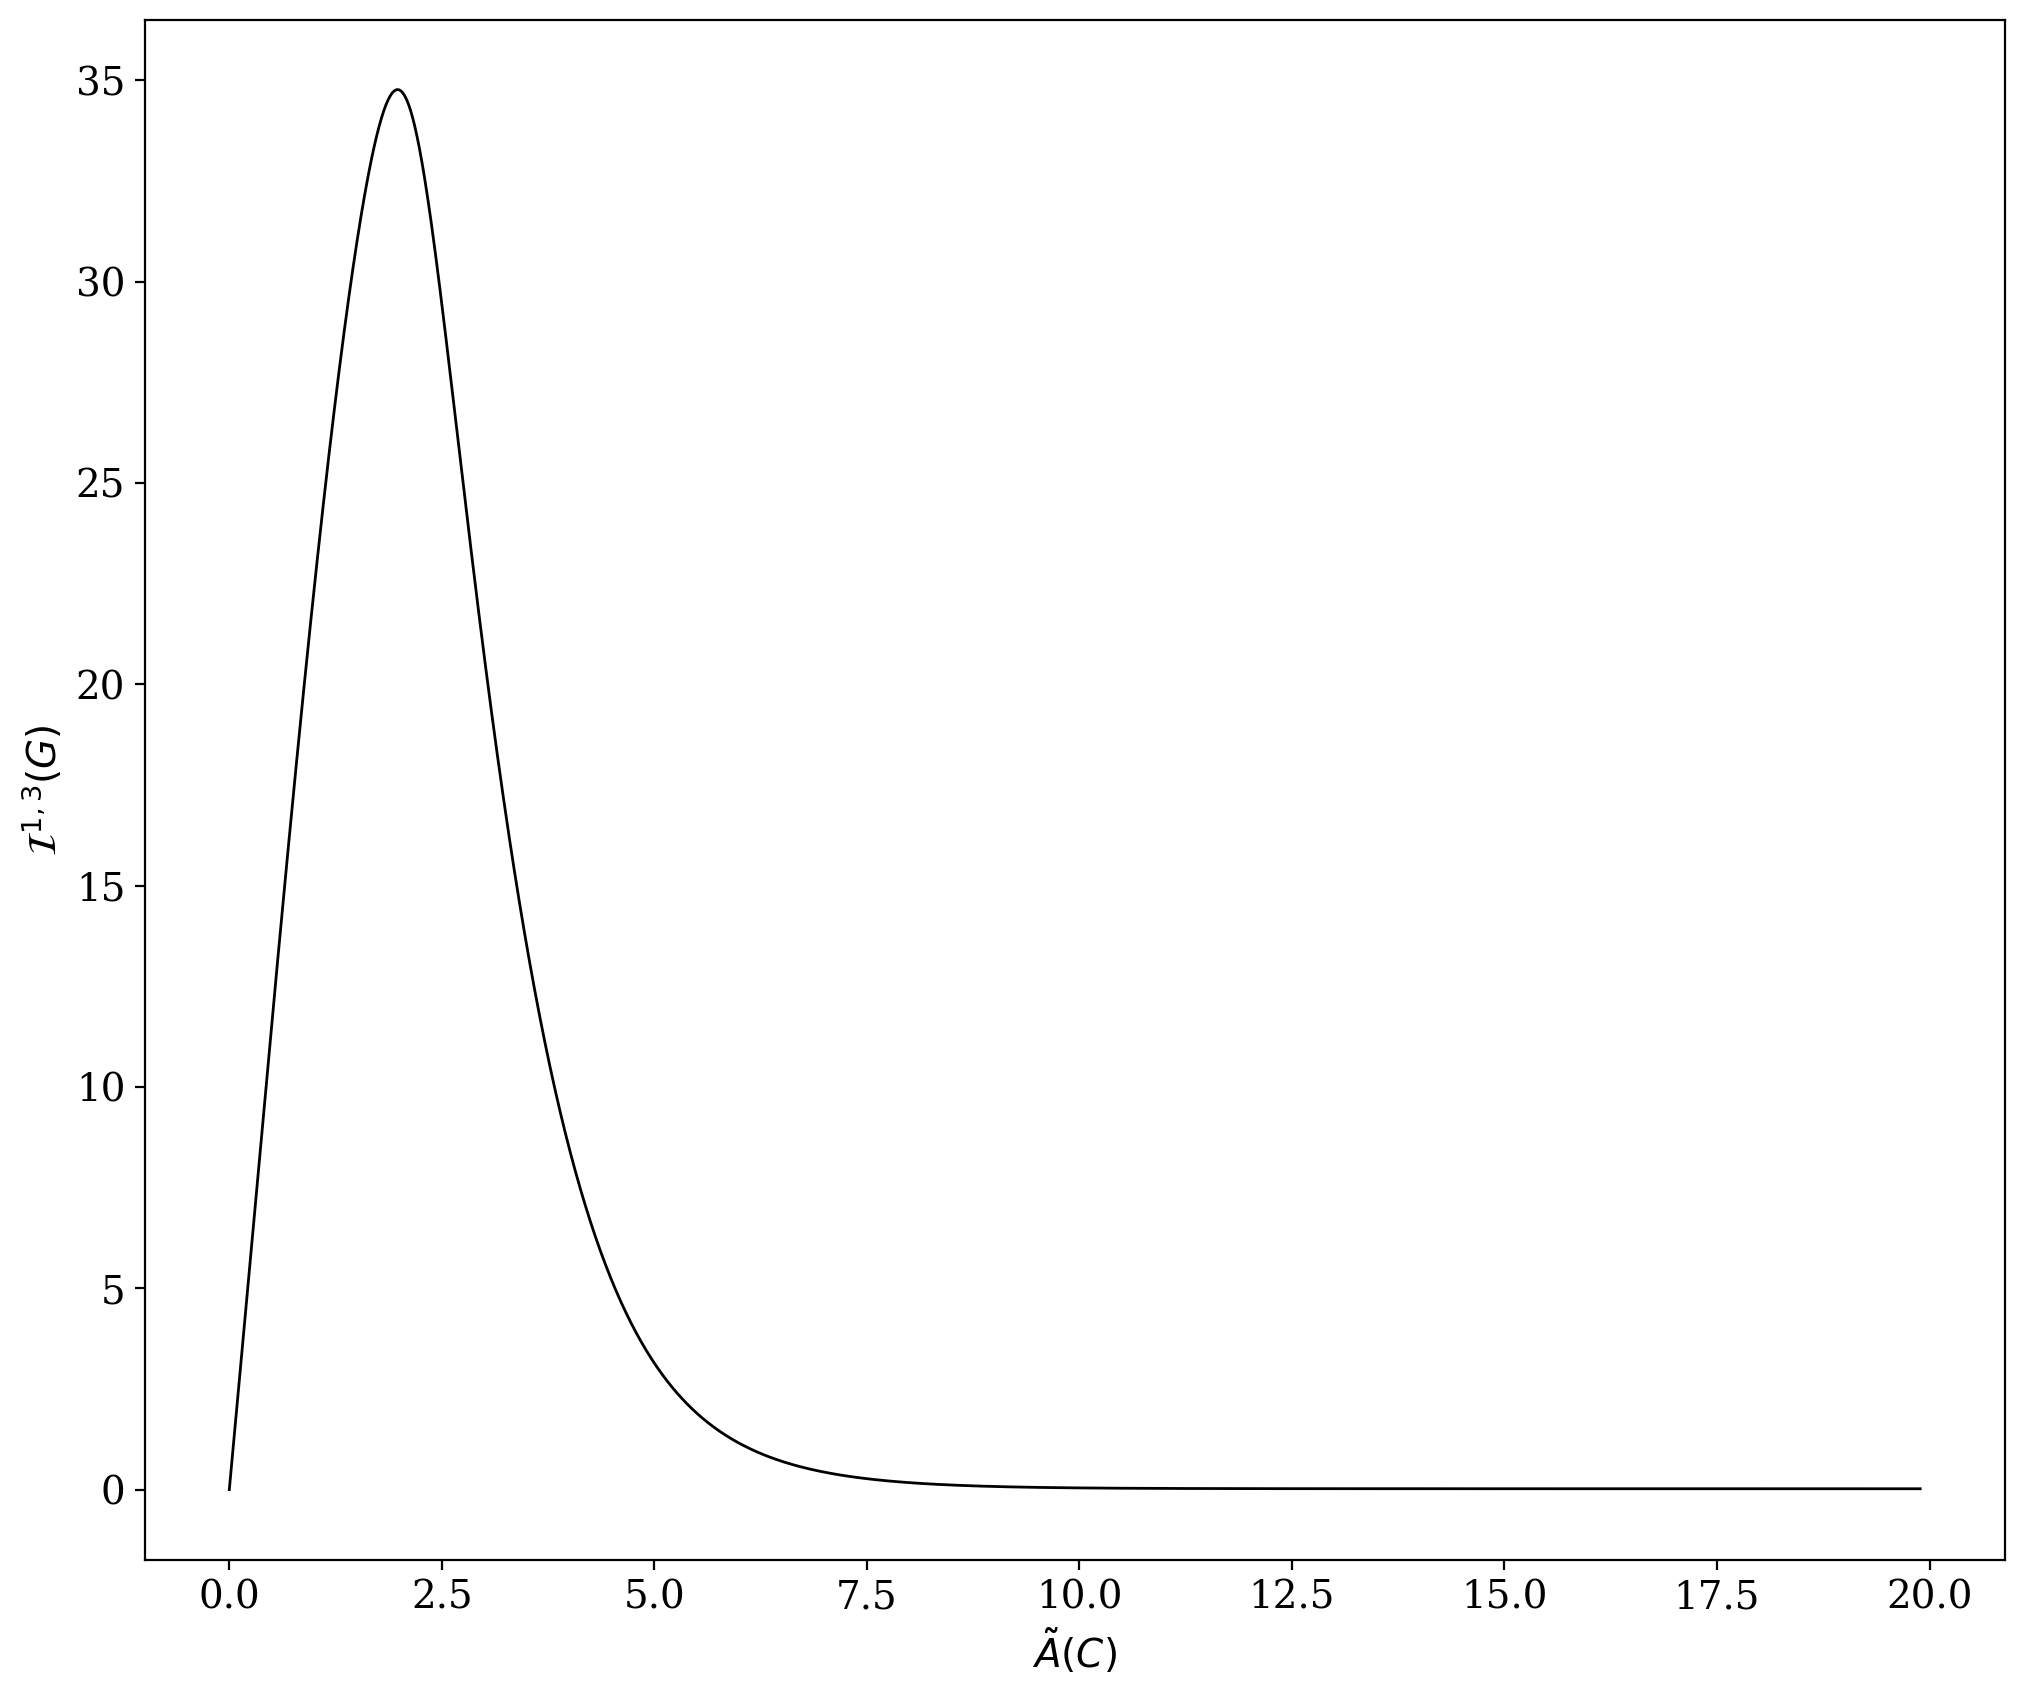

In [27]:
# Steinberg curve plot
plt.plot(np.abs(affinities),areas,label=r'$\mathcal{I}^{1,3}(G)$',linewidth=1, color= 'black')
plt.xlabel(r"$\tilde{A}(C)$")
plt.ylabel(r"$\mathcal{I}^{1,3}(G)$")
plt.show()

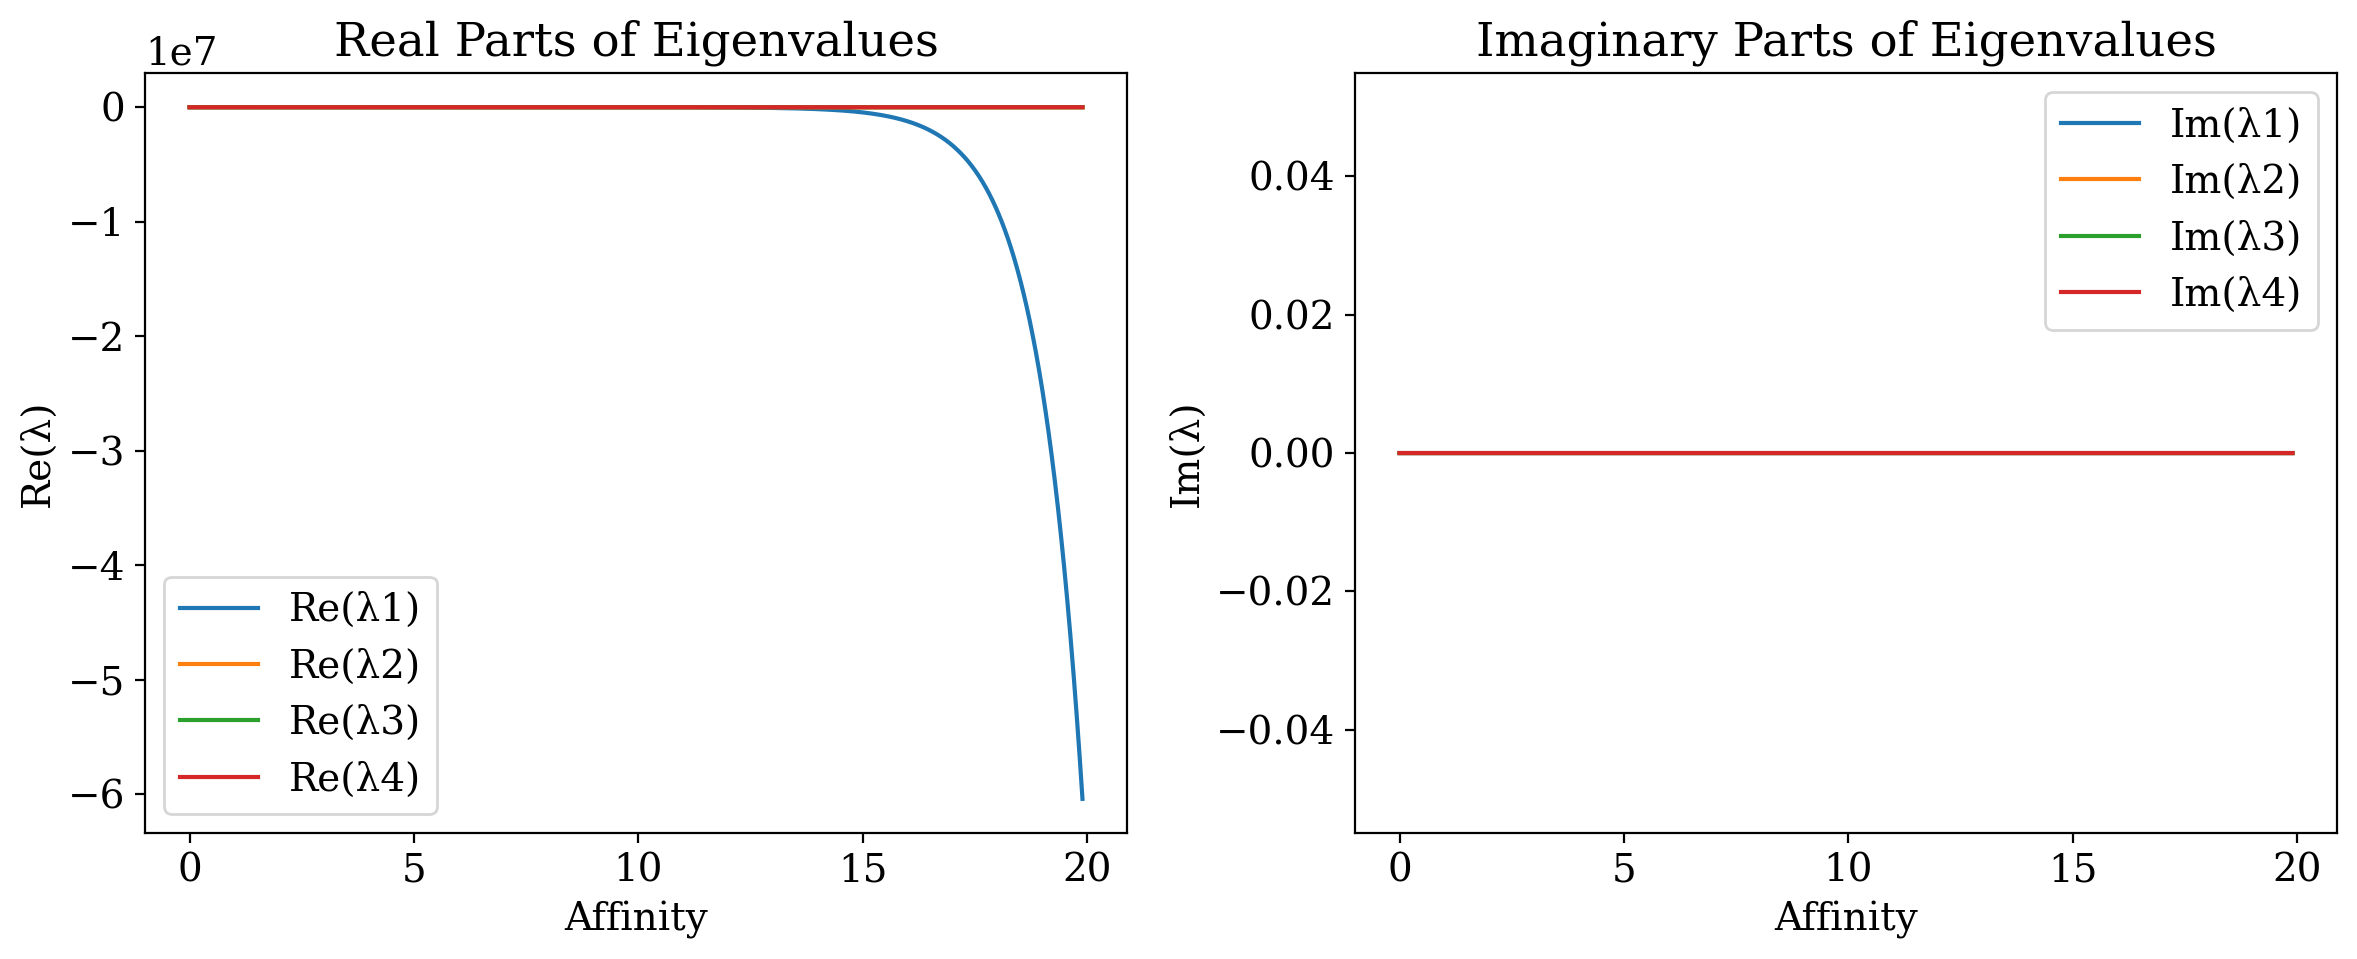

In [18]:
# Eigenvalues plots
plt.figure(figsize=(12,5))

# Real part
plt.subplot(1,2,1)
for j in range(4):
    plt.plot(affinities, eigvals_all_r[:, j], label=f"Re(λ{j+1})")
plt.xlabel("Affinity")
plt.ylabel("Re(λ)")
plt.title("Real Parts of Eigenvalues")
plt.legend()

# Imaginary part
plt.subplot(1,2,2)
for j in range(4):
    plt.plot(affinities, eigvals_all_c[:, j], label=f"Im(λ{j+1})")
plt.xlabel("Affinity")
plt.ylabel("Im(λ)")
plt.title("Imaginary Parts of Eigenvalues")
plt.legend()

plt.tight_layout()
#plt.savefig(f"eigenvalue_evolution_edge_{edge_idx}.png", dpi=300)
plt.show()

In [28]:
def spectrum_any(lap):
    lambdas, w_i, z_i = scipy.linalg.eig(lap, left=True,right=True)
    return lambdas, w_i, z_i

lambdas, w_i, z_i = spectrum_any(lap)

In [29]:
print(lambdas)

[-7.26779457e+08+0.j -9.50008445e+04+0.j -1.52602615e+01+0.j
 -6.74358310e-07+0.j]


In [30]:
print(w_i)

[[-7.53008485e-07 -9.99980682e-01 -7.04989470e-01  4.99999281e-01]
 [ 1.00000000e+00 -1.90611466e-08  1.09603620e-02  5.00000724e-01]
 [-5.55739429e-11 -1.51992370e-08  1.09603645e-02  5.00000724e-01]
 [ 6.07972380e-13  6.21582855e-03 -7.09048368e-01  4.99999272e-01]]


In [31]:
print(z_i)

[[-2.72942857e-09 -7.09096998e-01 -4.38167520e-03  9.54686458e-05]
 [ 7.07106782e-01 -5.33956262e-07 -3.25959219e-09  1.27446747e-10]
 [-7.07106780e-01  3.99792020e-03  7.09286412e-01  9.99882007e-01]
 [ 2.26362915e-10  7.05099612e-01 -7.04906793e-01  1.53611056e-02]]
